Iris KNN (k=5) accuracy: 0.9333
Iris confusion matrix (rows=true, cols=pred):
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


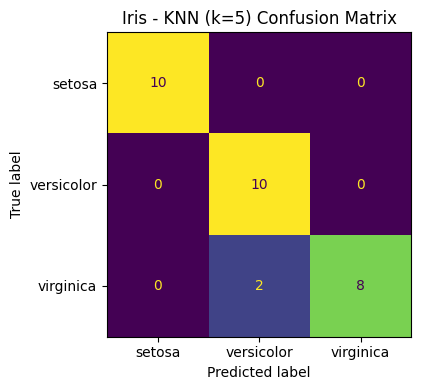

k=3: accuracy=0.9333
k=5: accuracy=0.9333
k=7: accuracy=0.9667
k=9: accuracy=0.9667


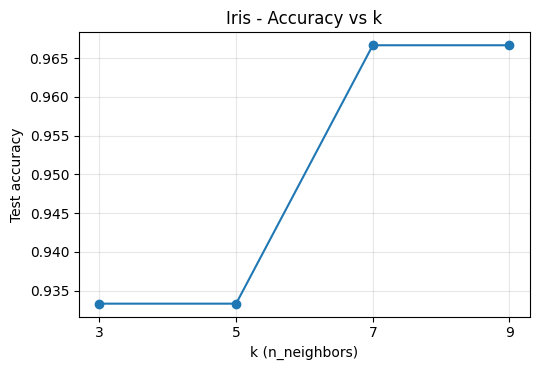

Note: Smaller k can overfit (high variance); larger k can underfit (high bias). Performance typically peaks at a moderate k.
Regressor k=3: RMSE=0.6831, R2=0.6439
Regressor k=5: RMSE=0.6576, R2=0.6700
Regressor k=7: RMSE=0.6545, R2=0.6731
Regressor k=9: RMSE=0.6516, R2=0.6760
Regressor k=11: RMSE=0.6470, R2=0.6806
Regressor k=15: RMSE=0.6471, R2=0.6804
Regressor k=25: RMSE=0.6531, R2=0.6745
Regressor k=35: RMSE=0.6586, R2=0.6690
Best k by RMSE: k=11, RMSE=0.6470, R2=0.6806


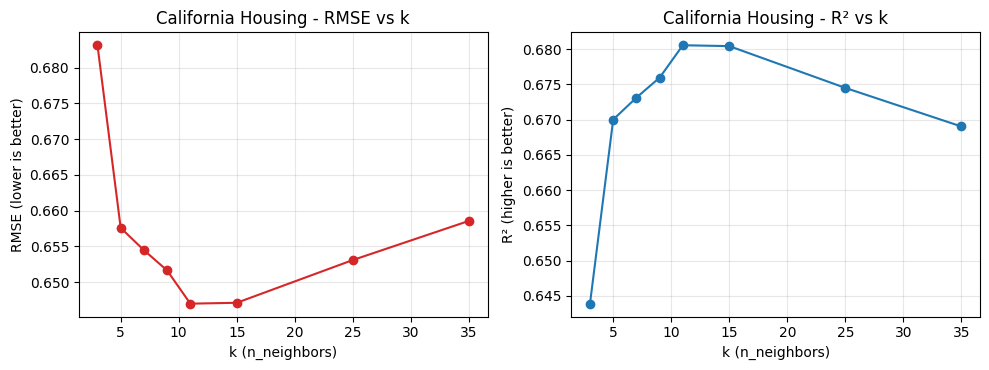

Observation: Smaller k often lowers bias but increases variance; larger k smooths predictions, improving stability but risking underfitting. Choose k via validation.


In [ ]:
import numpy as np
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

# KNN Classification on Iris and KNN Regression on California Housing
# This script trains, evaluates, and plots results for both tasks.

import matplotlib.pyplot as plt


RANDOM_STATE = 42

# ---------------------------
# Part (a) Iris - KNN Classifier
# ---------------------------
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris, y_iris, test_size=0.2, stratify=y_iris, random_state=RANDOM_STATE
)

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
])
clf.fit(X_train_i, y_train_i)
y_pred_i = clf.predict(X_test_i)

acc_i = accuracy_score(y_test_i, y_pred_i)
cm_i = confusion_matrix(y_test_i, y_pred_i, labels=np.unique(y_iris))
print(f"Iris KNN (k=5) accuracy: {acc_i:.4f}")
print("Iris confusion matrix (rows=true, cols=pred):")
print(cm_i)

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_i, display_labels=iris.target_names)
disp.plot(ax=ax, colorbar=False)
ax.set_title("Iris - KNN (k=5) Confusion Matrix")
plt.tight_layout()
plt.show()

# ---------------------------
# Part (b) Effect of k on accuracy
# ---------------------------
k_values_cls = [3, 5, 7, 9]
acc_values = []

for k in k_values_cls:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k, n_jobs=-1))
    ])
    pipe.fit(X_train_i, y_train_i)
    y_pred = pipe.predict(X_test_i)
    acc = accuracy_score(y_test_i, y_pred)
    acc_values.append(acc)
    print(f"k={k}: accuracy={acc:.4f}")

plt.figure(figsize=(5.5, 3.8))
plt.plot(k_values_cls, acc_values, marker='o')
plt.xticks(k_values_cls)
plt.xlabel("k (n_neighbors)")
plt.ylabel("Test accuracy")
plt.title("Iris - Accuracy vs k")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Note: Smaller k can overfit (high variance); larger k can underfit (high bias). Performance typically peaks at a moderate k.")

# ---------------------------
# Part (c) California Housing - KNN Regressor
# ---------------------------
cal = fetch_california_housing()
X_cal, y_cal = cal.data, cal.target  # target is median house value (in 100k USD)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=RANDOM_STATE
)

k_values_reg = [3, 5, 7, 9, 11, 15, 25, 35]
rmse_values = []
r2_values = []

for k in k_values_reg:
    reg = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsRegressor(n_neighbors=k, n_jobs=-1))
    ])
    reg.fit(X_train_c, y_train_c)
    y_pred_c = reg.predict(X_test_c)
    rmse = np.sqrt(mean_squared_error(y_test_c, y_pred_c))
    r2 = r2_score(y_test_c, y_pred_c)
    rmse_values.append(rmse)
    r2_values.append(r2)
    print(f"Regressor k={k}: RMSE={rmse:.4f}, R2={r2:.4f}")

best_idx = int(np.argmin(rmse_values))
best_k = k_values_reg[best_idx]
print(f"Best k by RMSE: k={best_k}, RMSE={rmse_values[best_idx]:.4f}, R2={r2_values[best_idx]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 3.8))

axes[0].plot(k_values_reg, rmse_values, marker='o', color='tab:red')
axes[0].set_xlabel("k (n_neighbors)")
axes[0].set_ylabel("RMSE (lower is better)")
axes[0].set_title("California Housing - RMSE vs k")
axes[0].grid(True, alpha=0.3)

axes[1].plot(k_values_reg, r2_values, marker='o', color='tab:blue')
axes[1].set_xlabel("k (n_neighbors)")
axes[1].set_ylabel("R² (higher is better)")
axes[1].set_title("California Housing - R² vs k")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observation: Smaller k often lowers bias but increases variance; larger k smooths predictions, improving stability but risking underfitting. Choose k via validation.")